In [3]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
annot_results = json.load(open('/home/yl3427/cylab/AAVE/vllm/aave_llama_final.json'))
len(annot_results)

24

In [5]:
scenarios = list(range(1, 7))
prompt = ["xx", "ox", "xo", "oo"]
labels = [
    "Pre-verbal markers",
    "Verbal tense-number marking",
    "Nouns and pronouns",
    "Negation",
    "Questions",
    "Existential and locative construction",
    "Lexical features",
    "Phonological features",
    "Out of list",
]

$$
P = \frac{2a}{2a + b + c}
$$

, where a is the number of identified features that both annotators agree, and b as well c is the number of identified features that only one annotator agrees.

In [12]:
def get_overlap_ratio(range1, range2):
    start = max(range1[0], range2[0])
    end = min(range1[1], range2[1])
    overlap = max(0, end - start)
    average_length = (range1[1] - range1[0] + range2[1] - range2[0]) / 2
    return overlap / average_length

a_s = {'total':0,} # Both(but from Lee)
b_s = {'total':0,} # only Lee
# c_s = {'total':0,} # only Chang
a_ids = []
both_ool = {}


threshold = 0.8

for i in range(len(annot_results)):
# for i in range(1):
    assert annot_results[i]['annotations'][0]['completed_by'] == 4 # Lee
    assert annot_results[i]['annotations'][1]['completed_by'] == 2 # Chang
    annot_results[i]['annotations'].append({'completed_by':99, 'result':[]}) # intersection

    answers_lee = {"answer1": [], "answer2": [], "answer3": [], "answer4": [], "answer5": [], "answer6": []}
    answers_chang = {"answer1": [], "answer2": [], "answer3": [], "answer4": [], "answer5": [], "answer6": []}

    # Lee's positive cases
    for idx1 in range(len(annot_results[i]['annotations'][0]['result'])):
        marked_body = annot_results[i]['annotations'][0]['result'][idx1]
        if 'start' not in marked_body['value'].keys():
            continue
        assert marked_body['value']['start'] == marked_body['value']['end']
        
        if marked_body['value']['start'] == '0':
            answers_lee['answer1'].append(marked_body)
        elif marked_body['value']['start'] == '1':
            answers_lee['answer2'].append(marked_body)
        elif marked_body['value']['start'] == '2':
            answers_lee['answer3'].append(marked_body)
        elif marked_body['value']['start'] == '3':
            answers_lee['answer4'].append(marked_body)
        elif marked_body['value']['start'] == '4':
            answers_lee['answer5'].append(marked_body)
        elif marked_body['value']['start'] == '5':
            answers_lee['answer6'].append(marked_body)
    
    # Chang's positive cases
    for idx2 in range(len(annot_results[i]['annotations'][1]['result'])):
        marked_body = annot_results[i]['annotations'][1]['result'][idx2]
        if 'start' not in marked_body['value'].keys():
            continue
        assert marked_body['value']['start'] == marked_body['value']['end']
        
        if marked_body['value']['start'] == '0':
            answers_chang['answer1'].append(marked_body)
        elif marked_body['value']['start'] == '1':
            answers_chang['answer2'].append(marked_body)
        elif marked_body['value']['start'] == '2':
            answers_chang['answer3'].append(marked_body)
        elif marked_body['value']['start'] == '3':
            answers_chang['answer4'].append(marked_body)
        elif marked_body['value']['start'] == '4':
            answers_chang['answer5'].append(marked_body)
        elif marked_body['value']['start'] == '5':
            answers_chang['answer6'].append(marked_body)
    
    for answer in ['answer1', 'answer2', 'answer3', 'answer4', 'answer5', 'answer6']:
        for idx1 in range(len(answers_lee[answer])):
            label1 = answers_lee[answer][idx1]['value']['paragraphlabels'][0]
            # if label1 == 'Out of list':
            #     continue
            text1 = answers_lee[answer][idx1]['value']['text']
            range1 = (answers_lee[answer][idx1]['value']['startOffset'], answers_lee[answer][idx1]['value']['endOffset'])

            
            agreed_candidates = []
            for idx2 in range(len(answers_chang[answer])):
                label2 = answers_chang[answer][idx2]['value']['paragraphlabels'][0]
                range2 = (answers_chang[answer][idx2]['value']['startOffset'], answers_chang[answer][idx2]['value']['endOffset'])
                overlap = get_overlap_ratio(range1, range2)
                if label1 == label2 and overlap > threshold:
                    if agreed_candidates and agreed_candidates[-1][-1] < overlap:
                        agreed_candidates.pop()
                    elif agreed_candidates and agreed_candidates[-1][-1] > overlap:
                        continue
                    agreed_candidates.append((idx1, idx2, overlap))
                    print(answers_chang[answer][idx2]['value'])
                   
            # if len(agreed_candidates) > 1:
            #     print(f"file {i}, {answer}, for {label1}, {text1}")
            #     print(agreed_candidates)

            if len(agreed_candidates) >= 1:
                a_s['total'] += 1
                a_s[label1] = a_s.get(label1, 0) + 1
                a_ids.append(answers_lee[answer][idx1]['id'])
                annot_results[i]['annotations'][2]['result'].append(answers_lee[answer][idx1])
                if label1 == 'Out of list':
                    both_ool[text1] = both_ool.get(text1, 0) + 1
            else:
                b_s['total'] += 1
                b_s[label1] = b_s.get(label1, 0) + 1

{'start': '0', 'end': '0', 'startOffset': 4, 'endOffset': 10, 'text': "havin'", 'paragraphlabels': ['Phonological features']}
{'start': '0', 'end': '0', 'startOffset': 32, 'endOffset': 35, 'text': 'doc', 'paragraphlabels': ['Out of list']}
{'start': '0', 'end': '0', 'startOffset': 48, 'endOffset': 53, 'text': "'bout", 'paragraphlabels': ['Phonological features']}
{'start': '0', 'end': '0', 'startOffset': 84, 'endOffset': 91, 'text': "hurtin'", 'paragraphlabels': ['Phonological features']}
{'start': '0', 'end': '0', 'startOffset': 92, 'endOffset': 101, 'text': "somethin'", 'paragraphlabels': ['Phonological features']}
{'start': '0', 'end': '0', 'startOffset': 163, 'endOffset': 171, 'text': "stabbin'", 'paragraphlabels': ['Phonological features']}
{'start': '0', 'end': '0', 'startOffset': 186, 'endOffset': 191, 'text': "goin'", 'paragraphlabels': ['Phonological features']}
{'start': '0', 'end': '0', 'startOffset': 267, 'endOffset': 274, 'text': "gettin'", 'paragraphlabels': ['Phonologica

In [13]:
sorted(both_ool.items(), key=lambda x: x[1], reverse=True)

[('doc', 92),
 ('Doc', 20),
 ("'em", 16),
 ('Nah', 11),
 ('whatnot', 7),
 ('ya hear', 5),
 ('Been', 5),
 (" 'em", 4),
 ('ya know?', 3),
 ('whatnot.', 2),
 ('ya know', 2),
 ('kinda', 1),
 ('regular', 1),
 (' doc', 1),
 ("Ain't", 1),
 ("ain't been nowhere", 1),
 ('ya hear?', 1),
 ('roommate, she', 1),
 ('doc,', 1),
 (' ya hear', 1),
 ('been', 1),
 ("nothin'", 1),
 ('', 1),
 ('nothin', 1),
 ('Lawd', 1),
 ("'em,", 1),
 (' whatnot', 1)]

In [9]:
n = 0
for k, v in both_ool.items():
    n+=v
n

203

In [5]:
len(a_ids)

1487

In [6]:
a_s

{'total': 1487,
 'Phonological features': 694,
 'Out of list': 183,
 'Negation': 232,
 'Pre-verbal markers': 238,
 'Nouns and pronouns': 73,
 'Verbal tense-number marking': 56,
 'Lexical features': 11}

In [7]:
b_s

{'total': 134,
 'Out of list': 90,
 'Verbal tense-number marking': 7,
 'Negation': 6,
 'Phonological features': 16,
 'Nouns and pronouns': 5,
 'Pre-verbal markers': 10}

In [8]:
a_s = {'total':0,} # Both(but from Chang)
# b_s = {'total':0,} # only Lee
c_s = {'total':0,} # only Chang


threshold = 0.8

for i in range(len(annot_results)):
# for i in range(1):
    assert annot_results[i]['annotations'][0]['completed_by'] == 4 # Lee
    assert annot_results[i]['annotations'][1]['completed_by'] == 2 # Chang
    answers_lee = {"answer1": [], "answer2": [], "answer3": [], "answer4": [], "answer5": [], "answer6": []}
    answers_chang = {"answer1": [], "answer2": [], "answer3": [], "answer4": [], "answer5": [], "answer6": []}

    # Lee's positive cases
    for idx1 in range(len(annot_results[i]['annotations'][0]['result'])):
        marked_body = annot_results[i]['annotations'][0]['result'][idx1]['value']
        if 'start' not in marked_body.keys():
            continue
        assert marked_body['start'] == marked_body['end']
        
        if marked_body['start'] == '0':
            answers_lee['answer1'].append(marked_body)
        elif marked_body['start'] == '1':
            answers_lee['answer2'].append(marked_body)
        elif marked_body['start'] == '2':
            answers_lee['answer3'].append(marked_body)
        elif marked_body['start'] == '3':
            answers_lee['answer4'].append(marked_body)
        elif marked_body['start'] == '4':
            answers_lee['answer5'].append(marked_body)
        elif marked_body['start'] == '5':
            answers_lee['answer6'].append(marked_body)
    
    # Chang's positive cases
    for idx2 in range(len(annot_results[i]['annotations'][1]['result'])):
        marked_body = annot_results[i]['annotations'][1]['result'][idx2]['value']
        if 'start' not in marked_body.keys():
            continue
        assert marked_body['start'] == marked_body['end']
        
        if marked_body['start'] == '0':
            answers_chang['answer1'].append(marked_body)
        elif marked_body['start'] == '1':
            answers_chang['answer2'].append(marked_body)
        elif marked_body['start'] == '2':
            answers_chang['answer3'].append(marked_body)
        elif marked_body['start'] == '3':
            answers_chang['answer4'].append(marked_body)
        elif marked_body['start'] == '4':
            answers_chang['answer5'].append(marked_body)
        elif marked_body['start'] == '5':
            answers_chang['answer6'].append(marked_body)
    
    for answer in ['answer1', 'answer2', 'answer3', 'answer4', 'answer5', 'answer6']:
        for idx2 in range(len(answers_chang[answer])):
            label2 = answers_chang[answer][idx2]['paragraphlabels'][0]
            # if label2 == 'Out of list':
            #     continue
            text2 = answers_chang[answer][idx2]['text']
            range2 = (answers_chang[answer][idx2]['startOffset'], answers_chang[answer][idx2]['endOffset'])

            agreed_candidates = []
            for idx1 in range(len(answers_lee[answer])):
                label1 = answers_lee[answer][idx1]['paragraphlabels'][0]
                range1 = (answers_lee[answer][idx1]['startOffset'], answers_lee[answer][idx1]['endOffset'])
                overlap = get_overlap_ratio(range1, range2)
                if label1 == label2 and overlap > threshold:
                    if agreed_candidates and agreed_candidates[-1][-1] < overlap:
                        agreed_candidates.pop()
                    elif agreed_candidates and agreed_candidates[-1][-1] > overlap:
                        continue
                    agreed_candidates.append((idx2, idx1, overlap))

            if len(agreed_candidates) > 1:
                print(f"file {i}, {answer}, for {label2}, {text2}")
                print(agreed_candidates)

            if len(agreed_candidates) >= 1:
                a_s['total'] += 1
                a_s[label2] = a_s.get(label2, 0) + 1
            else:
                c_s['total'] += 1
                c_s[label2] = c_s.get(label2, 0) + 1

file 16, answer1, for Out of list, Been
[(14, 18, 1.0), (14, 19, 1.0), (14, 20, 1.0), (14, 21, 1.0), (14, 22, 1.0)]
file 16, answer1, for Out of list, Been
[(15, 18, 1.0), (15, 19, 1.0), (15, 20, 1.0), (15, 21, 1.0), (15, 22, 1.0)]
file 16, answer1, for Out of list, Been
[(16, 18, 1.0), (16, 19, 1.0), (16, 20, 1.0), (16, 21, 1.0), (16, 22, 1.0)]
file 16, answer1, for Out of list, Been
[(17, 18, 1.0), (17, 19, 1.0), (17, 20, 1.0), (17, 21, 1.0), (17, 22, 1.0)]
file 16, answer1, for Out of list, Been
[(18, 18, 1.0), (18, 19, 1.0), (18, 20, 1.0), (18, 21, 1.0), (18, 22, 1.0)]


In [9]:
a_s

{'total': 1487,
 'Phonological features': 694,
 'Out of list': 183,
 'Negation': 232,
 'Pre-verbal markers': 238,
 'Nouns and pronouns': 73,
 'Verbal tense-number marking': 56,
 'Lexical features': 11}

In [10]:
c_s

{'total': 49,
 'Negation': 5,
 'Phonological features': 14,
 'Nouns and pronouns': 5,
 'Verbal tense-number marking': 6,
 'Out of list': 12,
 'Pre-verbal markers': 7}

In [11]:
iaa_score = {}
for label in labels:
    a = a_s.get(label, 0)
    b = b_s.get(label, 0)
    c = c_s.get(label, 0)
    support = a
    p = 2 * a / (2 * a + b + c) if a > 0 else 0
    print(f"{a}, {b}, {c}, {p}")
    iaa_score[label] = {"Agreement": p, "Support": support}

238, 10, 7, 0.9655172413793104
56, 7, 6, 0.896
73, 5, 5, 0.9358974358974359
232, 6, 5, 0.9768421052631578
0, 0, 0, 0
0, 0, 0, 0
11, 0, 0, 1.0
694, 16, 14, 0.9788434414668548
183, 90, 12, 0.782051282051282


In [12]:
pd.DataFrame(iaa_score).T.to_csv('iaa_score.csv')

In [13]:
iaa_score

{'Pre-verbal markers': {'Agreement': 0.9655172413793104, 'Support': 238},
 'Verbal tense-number marking': {'Agreement': 0.896, 'Support': 56},
 'Nouns and pronouns': {'Agreement': 0.9358974358974359, 'Support': 73},
 'Negation': {'Agreement': 0.9768421052631578, 'Support': 232},
 'Questions': {'Agreement': 0, 'Support': 0},
 'Existential and locative construction': {'Agreement': 0, 'Support': 0},
 'Lexical features': {'Agreement': 1.0, 'Support': 11},
 'Phonological features': {'Agreement': 0.9788434414668548, 'Support': 694},
 'Out of list': {'Agreement': 0.782051282051282, 'Support': 183}}

agree  

# Stats

### prompt  (total, feature) -> anova, t-test   

In [14]:
cnt = 0
for i in range(len(annot_results)):
    cnt += len(annot_results[i]['annotations'][2]['result'])
cnt

1487

In [15]:
# total
prompt = ["CompP", "DemoP", "LingP", "BaseP"]

total_distribution = {"CompP": [], "DemoP": [], "LingP": [], "BaseP": []}

for i in range(len(annot_results)):
    answers = {"answer1": [], "answer2": [], "answer3": [], "answer4": [], "answer5": [], "answer6": []}

    for idx1 in range(len(annot_results[i]['annotations'][2]['result'])):
        marked_body = annot_results[i]['annotations'][2]['result'][idx1]['value']
        if 'start' not in marked_body.keys():
            continue
        
        if marked_body['start'] == '0':
            answers['answer1'].append(marked_body)
        elif marked_body['start'] == '1':
            answers['answer2'].append(marked_body)
        elif marked_body['start'] == '2':
            answers['answer3'].append(marked_body)
        elif marked_body['start'] == '3':
            answers['answer4'].append(marked_body)
        elif marked_body['start'] == '4':
            answers['answer5'].append(marked_body)
        elif marked_body['start'] == '5':
            answers['answer6'].append(marked_body)

    total_distribution[prompt[i%4]].append(len(answers['answer1']))
    total_distribution[prompt[i%4]].append(len(answers['answer2']))
    total_distribution[prompt[i%4]].append(len(answers['answer3']))
    total_distribution[prompt[i%4]].append(len(answers['answer4']))
    total_distribution[prompt[i%4]].append(len(answers['answer5']))
    total_distribution[prompt[i%4]].append(len(answers['answer6']))
                                

In [16]:
total_distribution
df = pd.DataFrame.from_dict(total_distribution)[['DemoP', 'LingP', 'CompP']]
df.to_csv('distribution_total.csv', index=False)

In [17]:
import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)
import pingouin as pg

# From Llama3
df_long = df.reset_index().melt(id_vars='index', var_name='condition', value_name='score')
df_long.rename(columns={'index': 'subject'}, inplace=True)

rm_anova = pg.rm_anova(dv='score', within='condition', subject='subject', data=df_long, detailed=True)
print(rm_anova)
rm_anova

      Source       SS  DF      MS      F  p-unc   ng2   eps
0  condition  373.574   2 186.787 12.124  0.000 0.134 0.995
1      Error 1078.426  70  15.406    NaN    NaN   NaN   NaN


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,condition,373.574,2,186.787,12.124,0.000,0.134,0.995
1,Error,1078.426,70,15.406,NaN,NaN,NaN,NaN


In [18]:
post_hoc = pg.pairwise_tests(dv='score', within='condition', subject='subject', 
                              data=df_long, parametric=True, alternative='greater')
post_hoc

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,condition,CompP,DemoP,True,True,4.762,35.000,greater,0.000,1377.345,0.934
1,condition,CompP,LingP,True,True,2.526,35.000,greater,0.008,5.624,0.425
2,condition,DemoP,LingP,True,True,-2.485,35.000,greater,0.991,0.193,-0.538


In [19]:
post_hoc = pg.pairwise_tests(dv='score', within='condition', subject='subject', 
                              data=df_long, parametric=True, alternative='less')
post_hoc

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,condition,CompP,DemoP,True,True,4.762,35.000,less,1.000,0.001,0.934
1,condition,CompP,LingP,True,True,2.526,35.000,less,0.992,0.178,0.425
2,condition,DemoP,LingP,True,True,-2.485,35.000,less,0.009,5.183,-0.538


In [20]:
# # feature - prompt
# labels = [
#     "Pre-verbal markers",
#     "Verbal tense-number marking",
#     "Nouns and pronouns",
#     "Negation",
#     "Questions",
#     "Existential and locative construction",
#     "Lexical features",
#     "Phonological features",
#     "Out of list",
# ]

# label_distribution = {"CompP": {}, "DemoP": {}, "LingP": {}, "BaseP": {}}

# for label in labels:
#     label_distribution["CompP"][label] = 0
#     label_distribution["DemoP"][label] = 0
#     label_distribution["LingP"][label] = 0
#     label_distribution["BaseP"][label] = 0

# for i in range(len(annot_results)):
#     for idx in range(len(annot_results[i]['annotations'][2]['result'])):
#         marked_body = annot_results[i]['annotations'][2]['result'][idx1]['value']
#         print(marked_body["paragraphlabels"][0])
#         break


### case   (->heatmap)

In [21]:
case1 = range(1939, 1943)
case2 = range(1943, 1947)
case3 = range(1947, 1951)
case4 = range(1951, 1955)
case5 = range(1955, 1959)
case6 = range(1959, 1963)
prompt = ["CompP", "DemoP", "LingP", "BaseP"]

distribution = {"case1": {},
                "case2": {},
                "case3": {},
                "case4": {},
                "case5": {},
                "case6": {}}

labels = [
    "Pre-verbal markers",
    "Verbal tense-number marking",
    "Nouns and pronouns",
    "Negation",
    "Questions",
    "Existential and locative construction",
    "Lexical features",
    "Phonological features",
    "Out of list",
]

In [22]:
for i in range(len(annot_results)):
    # print(f"file {i}")
    id_val = annot_results[i]['id']
    if id_val in case1:
        case = "case1"
    elif id_val in case2:
        case = "case2"
    elif id_val in case3:
        case = "case3"
    elif id_val in case4:
        case = "case4"
    elif id_val in case5:
        case = "case5"
    elif id_val in case6:
        case = "case6"
    data = annot_results[i]['annotations'][2]['result']
    for d in data:
        if 'start' not in d['value'].keys():
            data.remove(d)
    distribution[case][prompt[i%4]] = data
       
distribution

{'case1': {'CompP': [{'value': {'start': '0',
     'end': '0',
     'startOffset': 4,
     'endOffset': 10,
     'text': "havin'",
     'paragraphlabels': ['Phonological features']},
    'id': 'K628yziXQI',
    'from_name': 'AAVE_features',
    'to_name': 'dialogue',
    'type': 'paragraphlabels',
    'origin': 'manual'},
   {'value': {'start': '0',
     'end': '0',
     'startOffset': 32,
     'endOffset': 35,
     'text': 'doc',
     'paragraphlabels': ['Out of list']},
    'id': 'GAydHzgPvt',
    'from_name': 'AAVE_features',
    'to_name': 'dialogue',
    'type': 'paragraphlabels',
    'origin': 'manual'},
   {'value': {'start': '0',
     'end': '0',
     'startOffset': 48,
     'endOffset': 53,
     'text': "'bout",
     'paragraphlabels': ['Phonological features']},
    'id': '8mQP7CPUSt',
    'from_name': 'AAVE_features',
    'to_name': 'dialogue',
    'type': 'paragraphlabels',
    'origin': 'manual'},
   {'value': {'start': '0',
     'end': '0',
     'startOffset': 84,
     'e

In [23]:
for k, v in distribution.items():
    print(k)
    for kk, vv in v.items():
        counts = {label: 0 for label in labels}
        print(kk, len(vv))
        v[kk] = len(vv)

df = pd.DataFrame.from_dict(distribution, orient='index')
df.to_csv('heatmap.csv')
df

case1
CompP 70
DemoP 65
LingP 80
BaseP 0
case2
CompP 99
DemoP 54
LingP 74
BaseP 0
case3
CompP 109
DemoP 87
LingP 67
BaseP 0
case4
CompP 99
DemoP 68
LingP 73
BaseP 0
case5
CompP 87
DemoP 73
LingP 83
BaseP 0
case6
CompP 114
DemoP 67
LingP 118
BaseP 0


,CompP,DemoP,LingP,BaseP
case1,70,65,80,0
case2,99,54,74,0
case3,109,87,67,0
case4,99,68,73,0
case5,87,73,83,0
case6,114,67,118,0


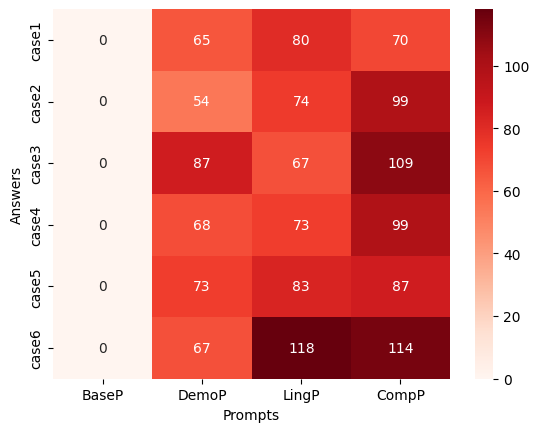

In [24]:
df = df[['BaseP', 'DemoP', 'LingP', 'CompP']]
sns.heatmap(df, cmap='Reds', annot=True, fmt='d')
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel("Prompts")
# plt.yticks(np.arange(0, 36, 5) + 0.5, labels=np.arange(0, 36, 5))
plt.ylabel("Answers")
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

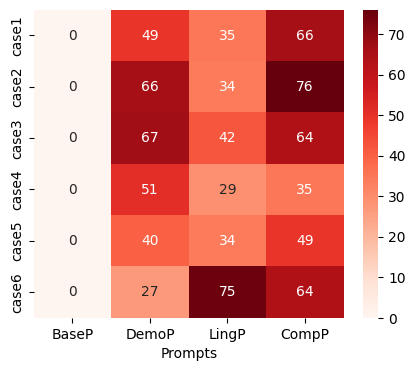

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'BaseP': [0, 0, 0, 0, 0, 0],
    'DemoP': [49, 66, 67, 51, 40, 27],
    'LingP': [35, 34, 42, 29, 34, 75],
    'CompP': [66, 76, 64, 35, 49, 64]
}
cases = ['case1', 'case2', 'case3', 'case4', 'case5', 'case6']

# Create DataFrame with the “cases” as the index
df = pd.DataFrame(data, index=cases)

# Reorder columns (if not already in that order)
df = df[['BaseP', 'DemoP', 'LingP', 'CompP']]

# Set font to Times New Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# Create heatmap
plt.figure(figsize=(5, 4))  # Adjust figure size as needed
sns.heatmap(df, cmap='Reds', annot=True, fmt='d')

plt.xlabel("Prompts")

# Uncomment / adjust y-ticks if desired:
# import numpy as np
# plt.yticks(np.arange(0, 6) + 0.5, labels=cases)

# Save and show
plt.savefig("heatmap_gpt4.png", dpi=300, bbox_inches='tight')
plt.show()


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

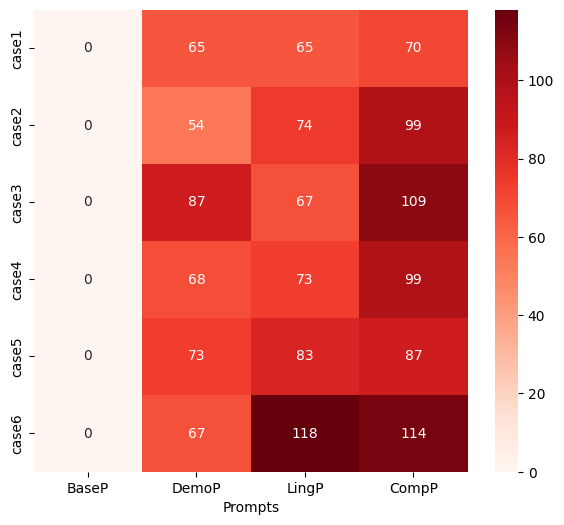

In [26]:
data = {
    'BaseP': [0, 0, 0, 0, 0, 0],
    'DemoP': [65, 54, 87, 68, 73, 67],
    'LingP': [65, 74, 67, 73, 83, 118],
    'CompP': [70, 99, 109, 99, 87, 114]
}
cases = ['case1', 'case2', 'case3', 'case4', 'case5', 'case6']

# Create DataFrame with the “cases” as the index
df = pd.DataFrame(data, index=cases)

# Reorder columns (if not already in that order)
df = df[['BaseP', 'DemoP', 'LingP', 'CompP']]

# Set font to Times New Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# Create heatmap
plt.figure(figsize=(7, 6))  # Adjust figure size as needed
sns.heatmap(df, cmap='Reds', annot=True, fmt='d')

plt.xlabel("Prompts")

# Uncomment / adjust y-ticks if desired:
# import numpy as np
# plt.yticks(np.arange(0, 6) + 0.5, labels=cases)

# Save and show
plt.savefig("heatmap_llama3.png", dpi=300, bbox_inches='tight')
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

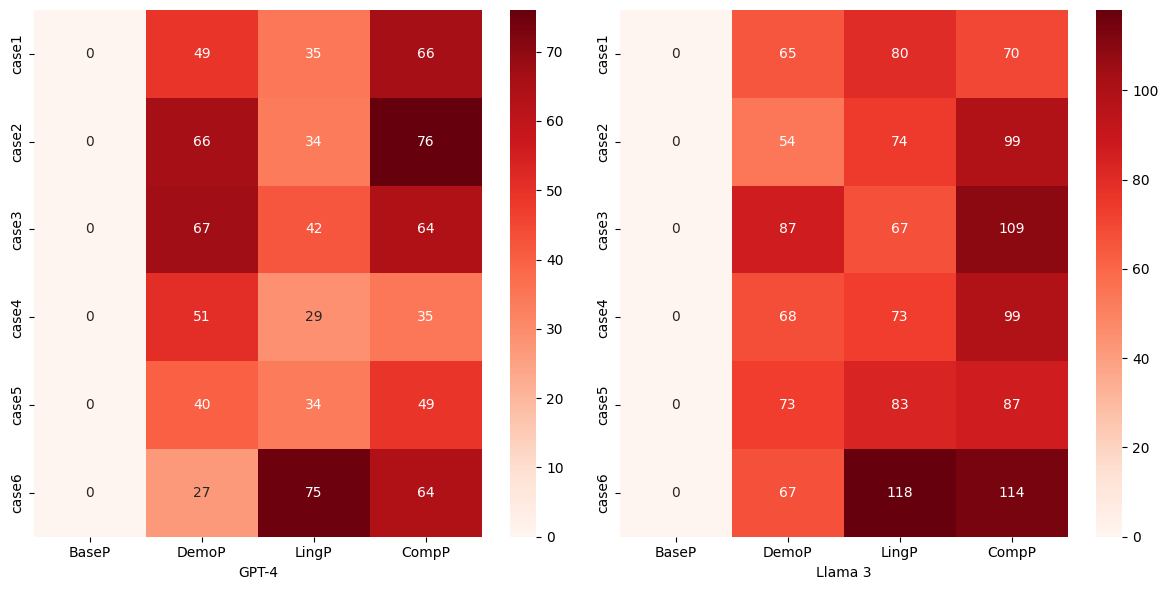

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1) Define GPT-4 data ---
gpt4_data = {
    'BaseP': [0, 0, 0, 0, 0, 0],
    'DemoP': [49, 66, 67, 51, 40, 27],
    'LingP': [35, 34, 42, 29, 34, 75],
    'CompP': [66, 76, 64, 35, 49, 64]
}
cases = ['case1', 'case2', 'case3', 'case4', 'case5', 'case6']
df_gpt4 = pd.DataFrame(gpt4_data, index=cases)
df_gpt4 = df_gpt4[['BaseP', 'DemoP', 'LingP', 'CompP']]

# --- 2) Define Llama 3 data ---
llama3_data = {
    'BaseP': [0, 0, 0, 0, 0, 0],
    'DemoP': [65, 54, 87, 68, 73, 67],
    'LingP': [80, 74, 67, 73, 83, 118],
    'CompP': [70, 99, 109, 99, 87, 114]
}
df_llama3 = pd.DataFrame(llama3_data, index=cases)
df_llama3 = df_llama3[['BaseP', 'DemoP', 'LingP', 'CompP']]

# --- 3) Create subplots side by side ---
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))  # adjust figure size as needed

# --- 4) Plot GPT-4 heatmap on the first subplot ---
sns.heatmap(
    df_gpt4, 
    cmap='Reds', 
    annot=True, 
    fmt='d', 
    # annot_kws={'color': 'black'},
    ax=axes[0]
)
axes[0].set_xlabel("GPT-4")

# --- 5) Plot Llama 3 heatmap on the second subplot ---
sns.heatmap(
    df_llama3, 
    cmap='Reds', 
    annot=True, 
    fmt='d', 
    # annot_kws={'color': 'black'},
    ax=axes[1]
)
axes[1].set_xlabel("Llama 3")
axes[1].set_ylabel("")  # typically hide or set to match the first plot

plt.tight_layout()
plt.savefig("compare_heatmaps.png", dpi=600, bbox_inches='tight')
plt.show()


### feature  

In [28]:
prompt = ["CompP", "DemoP", "LingP", "BaseP"]

labels = [
    "Pre-verbal markers",
    "Verbal tense-number marking",
    "Nouns and pronouns",
    "Negation",
    "Questions",
    "Existential and locative construction",
    "Lexical features",
    "Phonological features",
    "Out of list",
]

distribution = {"CompP": {"Pre-verbal markers": 0, "Verbal tense-number marking": 0, "Nouns and pronouns": 0, "Negation": 0, "Questions": 0, "Existential and locative construction": 0, "Lexical features": 0, "Phonological features": 0, "Out of list": 0},
                "DemoP": {"Pre-verbal markers": 0, "Verbal tense-number marking": 0, "Nouns and pronouns": 0, "Negation": 0, "Questions": 0, "Existential and locative construction": 0, "Lexical features": 0, "Phonological features": 0, "Out of list": 0},
                "LingP": {"Pre-verbal markers": 0, "Verbal tense-number marking": 0, "Nouns and pronouns": 0, "Negation": 0, "Questions": 0, "Existential and locative construction": 0, "Lexical features": 0, "Phonological features": 0, "Out of list": 0},
                "BaseP": {"Pre-verbal markers": 0, "Verbal tense-number marking": 0, "Nouns and pronouns": 0, "Negation": 0, "Questions": 0, "Existential and locative construction": 0, "Lexical features": 0, "Phonological features": 0, "Out of list": 0}}

for i in range(len(annot_results)):
    data = annot_results[i]['annotations'][2]['result']
    for d in data:
        if 'start' not in d['value'].keys():
            continue
        distribution[prompt[i%4]][d['value']['paragraphlabels'][0]] += 1

df = pd.DataFrame.from_dict(distribution)[['DemoP', 'LingP', 'CompP']]
df.to_csv('feature_distribution.csv')